In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [154]:
df = pd.read_csv(r"C:\Users\erena\Downloads\energy-consumption\2023-RES_proxies_EEA.csv")

df = df.dropna(axis=1, how='all')

In [180]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.strip()
print(df.columns)

Index(['CountryShort', 'Year', 'ValueNumeric', 'Unit', 'Market_Sector',
       'Data_source', 'Date',
       'GFEC:Article6Grossfinalconsumptionofenergyfromrenewablesources,withoutapplicable7%limitadjustment'],
      dtype='object')


In [186]:
df['ValueNumeric'] = pd.to_numeric(df['ValueNumeric'], errors='coerce')

print(df['ValueNumeric'].dtype)

float64


In [188]:
yearly_avg = df.groupby('Year')['ValueNumeric'].mean()
print(yearly_avg)

Year
2023    21.442389
Name: ValueNumeric, dtype: float64


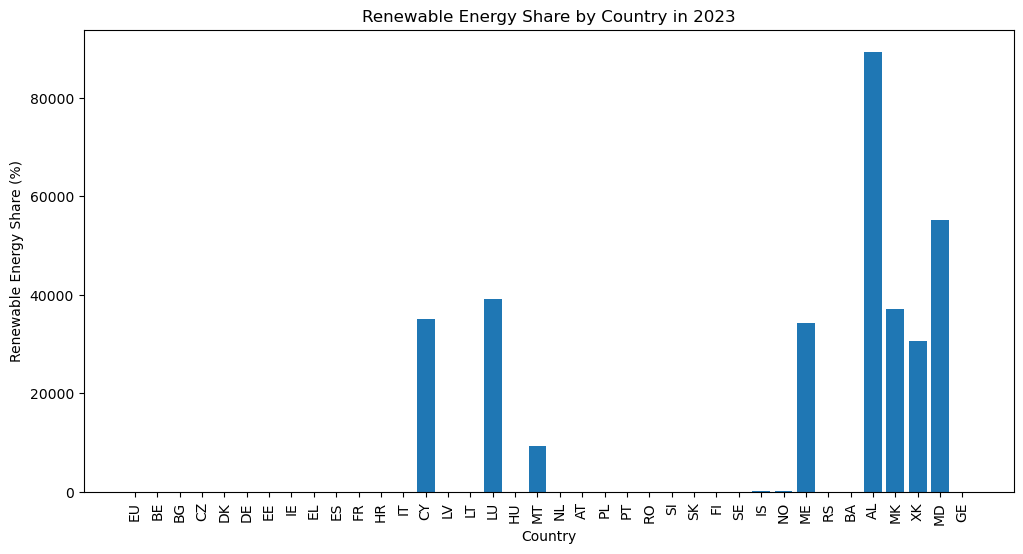

In [190]:
df_2023 = df[df['Year'] == 2023]

# Ülkelere göre değerleri görselleştirelim
plt.figure(figsize=(12, 6))
plt.bar(df_2023['CountryShort'], df_2023['ValueNumeric'] * 100)  # Yüzde formatında gösterim için 100 ile çarpıyoruz
plt.xlabel('Country')
plt.ylabel('Renewable Energy Share (%)')
plt.title('Renewable Energy Share by Country in 2023')
plt.xticks(rotation=90)
plt.show()

In [192]:
country_consumption = df.groupby('CountryShort')['ValueNumeric'].mean().sort_values(ascending=False)

top_5 = country_consumption.head(5)
bottom_5 = country_consumption.tail(5)

print("Highest Consumption Rates:\n", top_5)
print("\nLowest Consumption Rates:\n", bottom_5)

Highest Consumption Rates:
 CountryShort
AL    178.959855
MD    110.571507
LU     78.357285
MK     74.237786
CY     70.532627
Name: ValueNumeric, dtype: float64

Lowest Consumption Rates:
 CountryShort
BE    0.165995
CZ    0.164075
IE    0.160949
HU    0.157305
BA         NaN
Name: ValueNumeric, dtype: float64


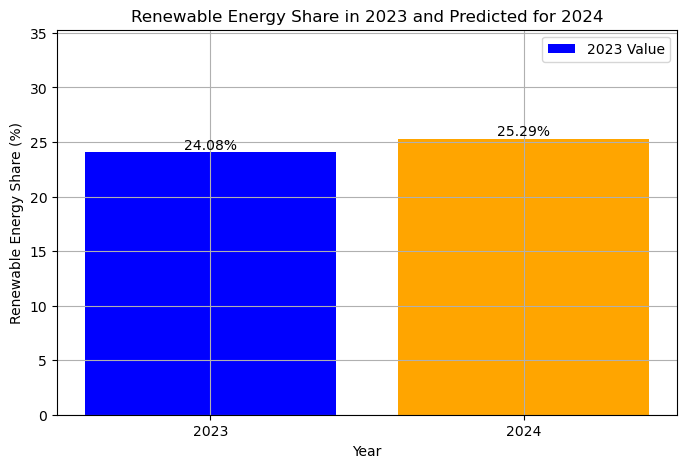

Renewable energy consumption forecast for 2024: 25.29%


In [212]:
current_consumption = df_2023['ValueNumeric'].values[0]

growth_rate = 0.05

predicted_value = current_consumption * (1 + growth_rate)

values = [current_consumption, predicted_value] 

plt.figure(figsize=(8, 5))
bars = plt.bar(years, np.array(values) * 100, color=['blue', 'orange']) 

for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.title('Renewable Energy Share in 2023 and Predicted for 2024')
plt.ylim(0, max(values) * 100 + 10)  

plt.legend(['2023 Value', '2024 Prediction'])
plt.grid()
plt.show()

print(f"Renewable energy consumption forecast for 2024: {predicted_value * 100:.2f}%")